In [15]:
import boto3
import pandas as pd
import json

bucket_name = 'serverless-etl-pipeline-akanksha'
prefix = 'raw-data/'

s3 = boto3.client('s3')

# Step 1: List all objects in the raw-data folder
response = s3.list_objects_v2(Bucket=bucket_name, Prefix=prefix)

# Step 2: Extract all object keys
files = [obj['Key'] for obj in response.get('Contents', []) if obj['Key'].endswith('.json')]

# Step 3: Sort keys by timestamp in filename
latest_file = sorted(files)[-1]  # Assumes filenames have timestamp format so sorting works

print(f"📄 Latest file found: {latest_file}")

# Step 4: Read latest file from S3
response = s3.get_object(Bucket=bucket_name, Key=latest_file)
content = response['Body'].read()

# Step 5: Load JSON
data = json.loads(content)
print("✅ Data loaded from latest file")
print(json.dumps(data, indent=2))


📄 Latest file found: raw-data/crypto-live-2025-08-02T16-30-12.json
✅ Data loaded from latest file
{
  "bitcoin": {
    "usd": 112864
  },
  "ethereum": {
    "usd": 3450.17
  },
  "solana": {
    "usd": 161.15
  }
}


       coin  price_usd
0   bitcoin  112864.00
1  ethereum    3450.17
2    solana     161.15


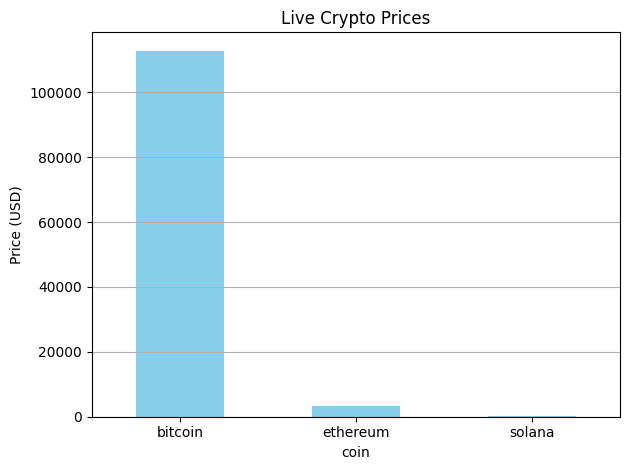

In [17]:
import pandas as pd

# Flatten the nested JSON structure
flattened = []
for coin, info in data.items():
    flattened.append({
        'coin': coin,
        'price_usd': info['usd']
    })

# Create DataFrame
df = pd.DataFrame(flattened)

# Show DataFrame
print(df)

# Optional: plot
import matplotlib.pyplot as plt

df.plot(x='coin', y='price_usd', kind='bar', legend=False, color='skyblue')
plt.title("Live Crypto Prices")
plt.ylabel("Price (USD)")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
